# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 288 kB/s 


In [3]:
dataset = pd.read_excel('../input/reevaluatedq11/Re-evaluated Automatic Research Stuff.xlsx', 'Q11', usecols = [9, 10,11], engine = 'openpyxl')

In [4]:
dataset[dataset['Anjali\'s Points'].isnull()]

,Anjali's Points,Sanskriti's Points,Rationale(1.5)


In [5]:
dataset = dataset.fillna(0.5)
dataset.replace(-1.5, 0, inplace = True)

In [6]:
dataset.head()

,Anjali's Points,Sanskriti's Points,Rationale(1.5)
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.5,1.0,1.5
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [7]:
X = np.array(dataset['Anjali\'s Points'])  #Anjali's score
Y = np.array(dataset['Rationale(1.5)'])   #evaluator score
Z = np.array(dataset['Sanskriti\'s Points']) #Sanskriti's Score

In [8]:
stats_table = pd.DataFrame(columns = ['Mean', 'Median'])
test_table = pd.DataFrame(columns = ['MWU_Statistic', 'MWU_P','ANOVA_Statistic','ANOVA_P', 'T2_Statistic','T2_P', 'T_Paired_Statistic','T_Paired_P'])
index = ['Anjali', 'Evaluator', 'Sanskriti']
pairs_index = ['Anjali,Evaluator', 'Sanskriti,Evaluator', 'Anjali,Sanskriti']
distributions = [X, Y, Z]

for index_val in range(len(index)):
    stats_table.loc[index[index_val],'Mean'] = np.mean(distributions[index_val])
    stats_table.loc[index[index_val],'Median'] = np.median(distributions[index_val])
    
stats_table

,Mean,Median
Anjali,0.474446,0.0
Evaluator,0.721465,0.0
Sanskriti,0.602641,0.0


In [9]:
def p_value_fill(value):
    if 'e' in str(value):
        return str(value)[-4:]
    else:
        return value

# Anjali vs Evaluator

## Statistical Test 1 : Mann-Whitney U Test

This test takes two independent samples X and Y as input. It has the null hypothesis that X's underlying distribution is the same as Y's underlying distribution. We need to perform this test to see if the null hypothesis is indeed successful, or if the alternate is true : that the samples are actually significantly different.

In [10]:
from scipy.stats import mannwhitneyu

In [11]:
statistic, p = mannwhitneyu(X,Y)

In [12]:
print("Statistic : ", statistic)
print("Probability : ", p)

Statistic :  571685.0
Probability :  4.098828327037312e-15


In [13]:
test_table.loc['Anjali,Evaluator','MWU_Statistic'] = statistic
test_table.loc['Anjali,Evaluator','MWU_P'] = p_value_fill(p)

In [14]:
X_groups = dataset.groupby('Anjali\'s Points').count()
X_groups

,Sanskriti's Points,Rationale(1.5)
Anjali's Points,,
0.0,618,618
0.5,161,161
1.0,232,232
1.5,163,163


In [15]:
Y_groups = dataset.groupby('Rationale(1.5)').count()
Y_groups

,Anjali's Points,Sanskriti's Points
Rationale(1.5),,
0.0,602,602
0.5,8,8
1.0,6,6
1.5,558,558


In [16]:
Z_groups = dataset.groupby('Sanskriti\'s Points').count()
Z_groups

,Anjali's Points,Rationale(1.5)
Sanskriti's Points,,
0.0,617,617
0.5,51,51
1.0,154,154
1.5,352,352


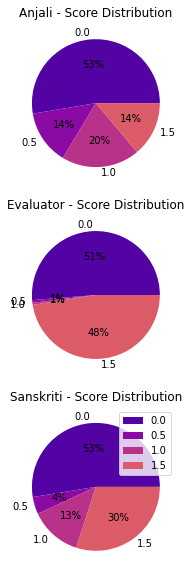

In [17]:
colors = sns.color_palette('plasma')[0:4]
fig, (ax1,ax2, ax3) = plt.subplots(3 , 1,figsize=(10,10))
ax1.pie(X_groups['Rationale(1.5)'], labels = X_groups.index, autopct = "%.0f%%", colors = colors)
ax1.set_title('Anjali - Score Distribution')
ax2.pie(Y_groups['Anjali\'s Points'], labels = Y_groups.index, autopct = "%.0f%%", colors = colors)
ax2.set_title('Evaluator - Score Distribution')
ax3.pie(Z_groups['Anjali\'s Points'], labels = Z_groups.index, autopct = "%.0f%%", colors = colors)
ax3.set_title('Sanskriti - Score Distribution')
plt.legend()
plt.show()

Assuming any standard p-value for significance score, it is concluded that the obtained p-value is much less than the target. This means that the null hypothesis has to be rejected. The distributions are clearly very different.

## Statistical test 2 : ANOVA

This test is used to check if the group means are significantly different. It technically stands for Analysis of Variance and should be used with more than two groups, but can be used with just two. 

Null hypothesis : The group means are equal
Alternate hypothesis : The group means are different

In [18]:
from scipy.stats import f_oneway
import random
random.seed(27112021)

In [19]:
X_sample  = random.sample(list(X), len(X)//2)
Y_sample  = random.sample(list(Y), len(Y//2))

In [20]:
anova_stat, anova_p = f_oneway(X_sample,Y_sample)

In [21]:
print("ANOVA Statistic:", anova_stat)
print("ANOVA P-value:", anova_p)

ANOVA Statistic: 43.60612439242273
ANOVA P-value: 5.302765858214534e-11


In [22]:
test_table.loc['Anjali,Evaluator','ANOVA_Statistic'] = anova_stat
test_table.loc['Anjali,Evaluator','ANOVA_P'] = p_value_fill(anova_p)

Based on the above P value and statistic, it is clear that the means differ significantly. The null hypothesis can be rejected without hesitation.

## Statistical test 3 : T-test

This test can be used to determine the relationship between two independent variables. Rather, we can compare if Anjali's effect on scores is significantly different from the evaluator.

In [23]:
from scipy.stats import ttest_ind, ttest_rel

In [24]:
t_val, p_val = ttest_ind(X, Y)

In [25]:
print("T-test statistic:", t_val)
print("P-value:", p_val)

T-test statistic: -9.044727731063928
P-value: 3.0641733299617565e-19


In [26]:
test_table.loc['Anjali,Evaluator','T2_Statistic'] = t_val
test_table.loc['Anjali,Evaluator','T2_P'] = p_value_fill(p_val)

In [27]:
paired_t, paired_p = ttest_rel(X, Y)

In [28]:
print("Paired T-test statistic:", paired_t)
print("Paired P-value:", paired_p)

Paired T-test statistic: -18.995960221070263
Paired P-value: 2.303743067860467e-70


In [29]:
test_table.loc['Anjali,Evaluator','T_Paired_Statistic'] = paired_t
test_table.loc['Anjali,Evaluator','T_Paired_P'] = p_value_fill(paired_p)

The p-value for these tests, both 2-sample and pairwise are much less than the standard. We can conclude the high significance of difference between evaluator and Anjali's ratings.

In [30]:
from sklearn.metrics import cohen_kappa_score

In [31]:
mark_map = {0:'A', 0.5:'B', 1:'C', 1.5:'D'}
X_cat = [mark_map[value] for value in X]
Y_cat = [mark_map[value] for value in Y]
Z_cat = [mark_map[value] for value in Z]

In [32]:
print("Agreement between Anjali and Evaluator:", cohen_kappa_score(X_cat,Y_cat))

Agreement between Anjali and Evaluator: 0.44040473106685685


In [33]:
test_table   

,MWU_Statistic,MWU_P,ANOVA_Statistic,ANOVA_P,T2_Statistic,T2_P,T_Paired_Statistic,T_Paired_P
"Anjali,Evaluator",571685.0,e-15,43.606124,e-11,-9.044728,e-19,-18.99596,e-70


# Evaluator vs Sanskriti

## Statistical Test 1 : Mann-Whitney U

In [34]:
statistic_s, p_s = mannwhitneyu(Z, Y)
print("Statistic : ", statistic_s)
print("Probability : ", p_s)

Statistic :  626065.0
Probability :  1.7942030765440324e-05


In [35]:
test_table.loc['Sanskriti,Evaluator','MWU_Statistic'] = statistic_s
test_table.loc['Sanskriti,Evaluator','MWU_P'] = p_value_fill(p_s)

## Statistical Test 2 : ANOVA

In [36]:
Z_sample = random.sample(list(Z), len(Z)//2)

In [37]:
anova_stat_s, anova_p_s = f_oneway(Z_sample,Y_sample)

In [38]:
print("ANOVA Statistic:", anova_stat_s)
print("ANOVA P-value:", anova_p_s)

ANOVA Statistic: 9.615211990804736
ANOVA P-value: 0.001960342153202432


In [39]:
test_table.loc['Sanskriti,Evaluator','ANOVA_Statistic'] = anova_stat_s
test_table.loc['Sanskriti,Evaluator','ANOVA_P'] = p_value_fill(anova_p_s)

## Statistical Test 3 : T-test

In [40]:
# two-sample t-test
t_val_s, p_val_s = ttest_ind(Z, Y)

In [41]:
print("T-test statistic:", t_val_s)
print("P-value:", p_val_s)

T-test statistic: -4.051039506591671
P-value: 5.26476936965127e-05


In [42]:
test_table.loc['Sanskriti,Evaluator','T2_Statistic'] = t_val_s
test_table.loc['Sanskriti,Evaluator','T2_P'] = p_value_fill(p_val_s)

In [43]:
# paired t-test
paired_t_s, paired_p_s = ttest_rel(Z, Y)

In [44]:
print("Paired T-test statistic:", paired_t_s)
print("Paired P-value:", paired_p_s)

Paired T-test statistic: -11.00060048181635
Paired P-value: 7.404065218926756e-27


In [45]:
test_table.loc['Sanskriti,Evaluator','T_Paired_Statistic'] = paired_t_s
test_table.loc['Sanskriti,Evaluator','T_Paired_P'] = p_value_fill(paired_p_s)

In [46]:
print("Agreement between Sanskriti and Evaluator:", cohen_kappa_score(Z_cat,Y_cat))

Agreement between Sanskriti and Evaluator: 0.6416015938815515


In [47]:
test_table

,MWU_Statistic,MWU_P,ANOVA_Statistic,ANOVA_P,T2_Statistic,T2_P,T_Paired_Statistic,T_Paired_P
"Anjali,Evaluator",571685.0,e-15,43.606124,e-11,-9.044728,e-19,-18.99596,e-70
"Sanskriti,Evaluator",626065.0,e-05,9.615212,0.00196,-4.05104,e-05,-11.0006,e-27


# Anjali vs Sanskriti

## Statistical Test 1 : Mann-Whitney U Test

In [48]:
statistic_as, p_as = mannwhitneyu(X,Z)
print("Statistic : ", statistic_as)
print("Probability : ", p_as)

Statistic :  629609.5
Probability :  7.584265437894556e-05


In [49]:
test_table.loc['Anjali,Sanskriti','MWU_Statistic'] = statistic_as
test_table.loc['Anjali,Sanskriti','MWU_P'] = p_value_fill(p_as)

## Statistical Test 2 : ANOVA

In [50]:
anova_stat_as, anova_p_as = f_oneway(X_sample,Z_sample)

In [51]:
print("ANOVA Statistic:", anova_stat_as)
print("ANOVA P-value:", anova_p_as)

ANOVA Statistic: 10.45267352180343
ANOVA P-value: 0.0012588561231025607


In [52]:
test_table.loc['Anjali,Sanskriti','ANOVA_Statistic'] = anova_stat_as
test_table.loc['Anjali,Sanskriti','ANOVA_P'] = p_value_fill(anova_p_as)

## Statistical Test 3 : T-test

In [53]:
# two-sample t-test
t_val_as, p_val_as = ttest_ind(X,Z)

In [54]:
print("T-test statistic:", t_val_as)
print("P-value:", p_val_as)

T-test statistic: -4.99482451220366
P-value: 6.322683959931308e-07


In [55]:
test_table.loc['Anjali,Sanskriti','T2_Statistic'] = t_val_as
test_table.loc['Anjali,Sanskriti','T2_P'] = p_value_fill(p_val_as)

In [56]:
# paired t-test
paired_t_as, paired_p_as = ttest_rel(X,Z)

In [57]:
print("Paired T-test statistic:", paired_t_as)
print("Paired P-value:", paired_p_as)

Paired T-test statistic: -15.437909364284565
Paired P-value: 4.344319895493998e-49


In [58]:
test_table.loc['Anjali,Sanskriti','T_Paired_Statistic'] = paired_t_as
test_table.loc['Anjali,Sanskriti','T_Paired_P'] = p_value_fill(paired_p_as)

In [59]:
print("Agreement between Sanskriti and Anjali:", cohen_kappa_score(Z_cat,X_cat))

Agreement between Sanskriti and Anjali: 0.5228787870329534


In [60]:
test_table.loc['Anjali,Sanskriti','CKS'] = cohen_kappa_score(Z_cat, X_cat)
test_table.loc['Anjali,Evaluator','CKS'] = cohen_kappa_score(Y_cat, X_cat)
test_table.loc['Sanskriti,Evaluator','CKS'] = cohen_kappa_score(Z_cat, Y_cat)

In [61]:
test_table

,MWU_Statistic,MWU_P,ANOVA_Statistic,ANOVA_P,T2_Statistic,T2_P,T_Paired_Statistic,T_Paired_P,CKS
"Anjali,Evaluator",571685.0,e-15,43.606124,e-11,-9.044728,e-19,-18.99596,e-70,0.440405
"Sanskriti,Evaluator",626065.0,e-05,9.615212,0.00196,-4.05104,e-05,-11.0006,e-27,0.641602
"Anjali,Sanskriti",629609.5,e-05,10.452674,0.001259,-4.994825,e-07,-15.437909,e-49,0.522879
